## INDEXAR, SELECCIONAR I FILTRAR

In [1]:
import pandas as pd

In [2]:
db = pd.read_csv('insurance.csv')
db.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# para ver 5 observaciones, entre ellas el total de filas
pd.set_option("display.max_rows",5)
db

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
...,...,...,...,...,...,...,...
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
# si volem específicament la informació de una variable (p.e: 'region')
db['region']

0       southwest
1       southeast
          ...    
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [7]:
# cerquem el valor màxim de la columna bmi
db['bmi'].max()

53.13

In [9]:
# volem seleccionar només els primers 30 valors d'una columna
bmi_30 = db['bmi'][0:30]
bmi_30

0     27.900
1     33.770
       ...  
28    17.385
29    36.300
Name: bmi, Length: 30, dtype: float64

In [10]:
# mirem el valor màxim d'aquestes primeres 30 observacions

bmi_30.max()

42.13

In [11]:
# volem treballar només amb les deu primeres files i les dues primeres columnes:

db2= db.iloc[0:10,0:2]
db2

,age,sex
0,19,female
1,18,male
...,...,...
8,37,male
9,60,female


In [12]:
#  en comptes d'un interval, podem seleccionar específicament files i/o columnes
db3 = db.iloc[[0,5,6],[0,4]]
db3

,age,smoker
0,19,yes
5,31,no
6,46,no


In [20]:
# també podem fer servir els noms propis per seleccionar columnes 
# OJO QUE AQUÍ USAMOS LOC EN LUGAR DE ILOC
db4 = db.loc[0:8,['children','age']]
db4

,children,age
0,0,19
1,1,18
...,...,...
7,3,37
8,2,37


In [24]:
# creem taules reduïdes a partir d'una taula madre
db_southwest = db.loc[db.region == 'southwest']
db_southwest


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924
12,23,male,34.4,0,no,southwest,1826.843
...,...,...,...,...,...,...,...
1332,52,female,44.7,3,no,southwest,11411.685
1336,21,female,25.8,0,no,southwest,2007.945


In [25]:
db.loc[(db.bmi>=35)&(db.bmi<=45)].describe()

,age,bmi,children,charges
count,296.000000,296.000000,296.000000,296.000000
mean,41.679054,38.301976,1.027027,16913.681515
...,...,...,...,...
75%,54.000000,39.840000,2.000000,26781.395215
max,64.000000,44.880000,5.000000,58571.074480


In [26]:
# creem una nova columna
approved = []
for bmi in db['bmi']:
    if bmi<45:
        approved.append(True)
    else:
        approved.append(False)
db['approved']=approved
db.head()

,age,sex,bmi,children,smoker,region,charges,approved
0,19,female,27.900,0,yes,southwest,16884.92400,True
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


## ORDENAR I AGRUPAR DADES NO DISPONIBLES

In [27]:
# com es distribueixen els valors de region?

db.groupby('region').size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

In [28]:
#  quin és el valor màxim de bmi per a cada regió:

db.groupby('region')['bmi'].max()

region
northeast    48.07
northwest    42.94
southeast    53.13
southwest    47.60
Name: bmi, dtype: float64

In [29]:
# mitjana de bmi per a cada regió:

db.groupby('region')['bmi'].mean()

region
northeast    29.173503
northwest    29.199785
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64

In [31]:
# per generar la llista d'aquestes mitjanes de manera ordenada:

sorted(db.groupby('region')['bmi'].mean())

[29.173503086419753, 29.199784615384615, 30.596615384615383, 33.35598901098901]

In [36]:
# mitjanes dels preus de les pòlisse agrupades, 
# en un primer nivell, per la regió i, en un segon nivell, per la variable smoker.

db.groupby(['region','smoker'])['charges'].mean()


region     smoker
northeast  no         9165.531672
           yes       29673.536473
                         ...     
southwest  no         8019.284513
           yes       32269.063494
Name: charges, Length: 8, dtype: float64

Veiem clarament que, independentment de la regió, la mitjana de preus sempre és més alta, si la persona és fumadora, que quan no ho és.

In [37]:
# ara canviem la variable smoker per sex

db.groupby(['region','sex'])['charges'].mean()

region     sex   
northeast  female    12953.203151
           male      13854.005374
                         ...     
southwest  female    11274.411264
           male      13412.883576
Name: charges, Length: 8, dtype: float64

Veiem que, en totes les regions, excepte a southwest, la mitjana de preus és més alta per als homes que per a les dones. 

Text(0.5, 1.0, 'Mean charges by region and sex')

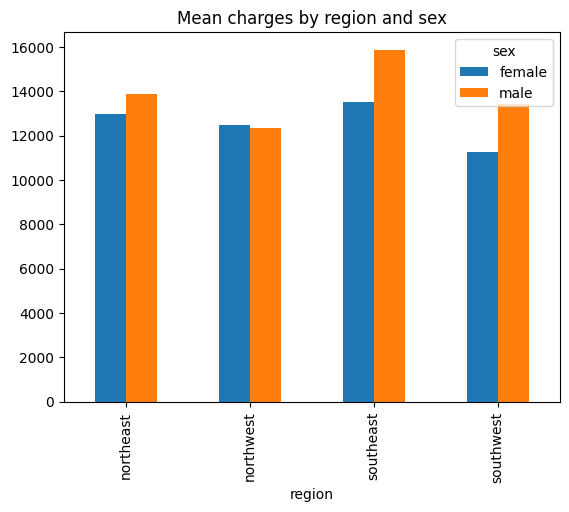

In [41]:
# Grafiquem
import matplotlib.pyplot as plt

group = db.groupby(['region','sex'])['charges'].mean()

group.unstack(fill_value=0).plot.bar()
plt.title('Mean charges by region and sex')

In [42]:
# ordenem la base de dades
db.sort_values(['age','bmi'])

,age,sex,bmi,children,smoker,region,charges,approved
172,18,male,15.96,0,no,northeast,1694.7964,True
250,18,male,17.29,2,yes,northeast,12829.4551,True
...,...,...,...,...,...,...,...,...
768,64,female,39.70,0,no,southwest,14319.0310,True
534,64,male,40.48,0,no,southeast,13831.1152,True


In [44]:
# mostrem només els primers 12 registres d'aquest ordre

pd.reset_option("display.max_rows")

db.sort_values(['age','bmi']).head(12)

,age,sex,bmi,children,smoker,region,charges,approved
172,18,male,15.960,0,no,northeast,1694.79640,True
250,18,male,17.290,2,yes,northeast,12829.45510,True
359,18,female,20.790,0,no,southeast,1607.51010,True
1212,18,male,21.470,0,no,northeast,1702.45530,True
1033,18,male,21.565,0,yes,northeast,13747.87235,True
1282,18,female,21.660,0,yes,northeast,14283.45940,True
1080,18,male,21.780,2,no,southeast,11884.04858,True
295,18,male,22.990,0,no,northeast,1704.56810,True
1041,18,male,23.085,0,no,northeast,1704.70015,True
940,18,male,23.210,0,no,southeast,1121.87390,True


In [46]:
# si volem invertir l'ordre de manera descedent:

db.sort_values(['age','bmi'],ascending=[False,False]).head(12)

,age,sex,bmi,children,smoker,region,charges,approved
534,64,male,40.480,0,no,southeast,13831.11520,True
768,64,female,39.700,0,no,southwest,14319.03100,True
199,64,female,39.330,0,no,northeast,14901.51670,True
418,64,male,39.160,1,no,southeast,14418.28040,True
603,64,female,39.050,3,no,southeast,16085.12750,True
635,64,male,38.190,0,no,northeast,14410.93210,True
752,64,male,37.905,0,no,northwest,14210.53595,True
1241,64,male,36.960,2,yes,southeast,49577.66240,True
801,64,female,35.970,0,no,southeast,14313.84630,True
335,64,male,34.500,0,no,southwest,13822.80300,True


In [47]:
# volem saber si entre els registres 230 i 238 de la columna smoker hi ha Nas o no

db['smoker'][230:238].isna()

230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
Name: smoker, dtype: bool

Observant els resultats, podem concloure que, en aquest interval de valors, no tenim cap Na, ja que tots els valors que torna la funció isna() són False

In [48]:
# copiem la base de dades en una nova variable

db_2=db[:] #important! no són el mateix objecte

In [50]:
db_2['smoker'][230] = None
db_2['smoker'][230:239].isna()

# La taula que obtenim ara sí que té un Na

C:\Users\mica_\AppData\Local\Temp\ipykernel_14572\605449190.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  db_2['smoker'][230] = None
C:\Users\mica_\AppData\Local\Temp\ipykernel_14572\605449190.py:1: SettingWithCopyWarning: 
A value is 

230     True
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
Name: smoker, dtype: bool